<a href="https://colab.research.google.com/github/HansHenseler/masdav2023/blob/main/Part_2_Data_Visualisation_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Visualisation introduction


Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2023




# Part 2

This exercise starts with examples of most common data analysis tasks with Python, from the features of Python itself to using Pandas Dataframes that you practiced in part 1. At the end are a few exercises that you can try to accomplish yourself.

The first part of this exercise has been adapted from https://machinelearningmastery.com/time-series-data-visualization-with-python/

Time series lends itself naturally to visualization and is an important part of digital forensics and cyber investigations in particular.

Line plots of observations over time are popular, but there is a suite of other plots that you can use to learn more about your problem.

The more you learn about your data, the more likely you are to develop a better  model. In this tutorial, you will discover 6 different types of plots that you can use to visualize time series data with Python.

In this part, we will take a look at 6 different types of visualizations that you can use on your own time series data. They are:

1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Autocorrelation Plots.



Minimum Daily Temperatures Dataset
This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

Below is an example of loading the dataset as a Panda Series.

In [1]:

from pandas import read_csv
from matplotlib import pyplot
# we need to upgrade the plotly version that is pre-installed in Google Colab
#
!pip install --upgrade plotly

import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [2]:

series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.head()

<ipython-input-2-f027a05d0792>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

## 1 Time Series Line Plot
The first, and perhaps most popular, visualization for time series is the line plot.

In this plot, time is shown on the x-axis with observation values along the y-axis.

Below is an example of visualizing the Pandas Series of the Minimum Daily Temperatures dataset directly as a line plot.

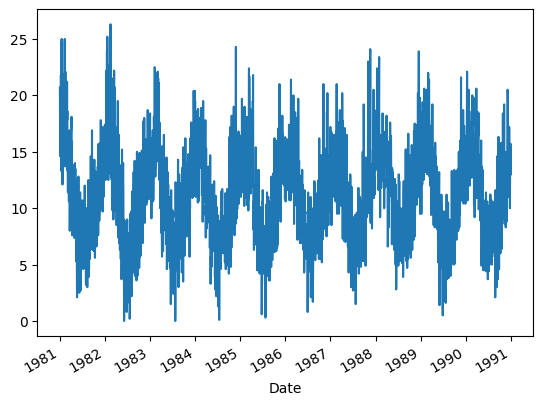

In [3]:
series.plot()
pyplot.show()

The line plot is quite dense. Can we make the plot wider?

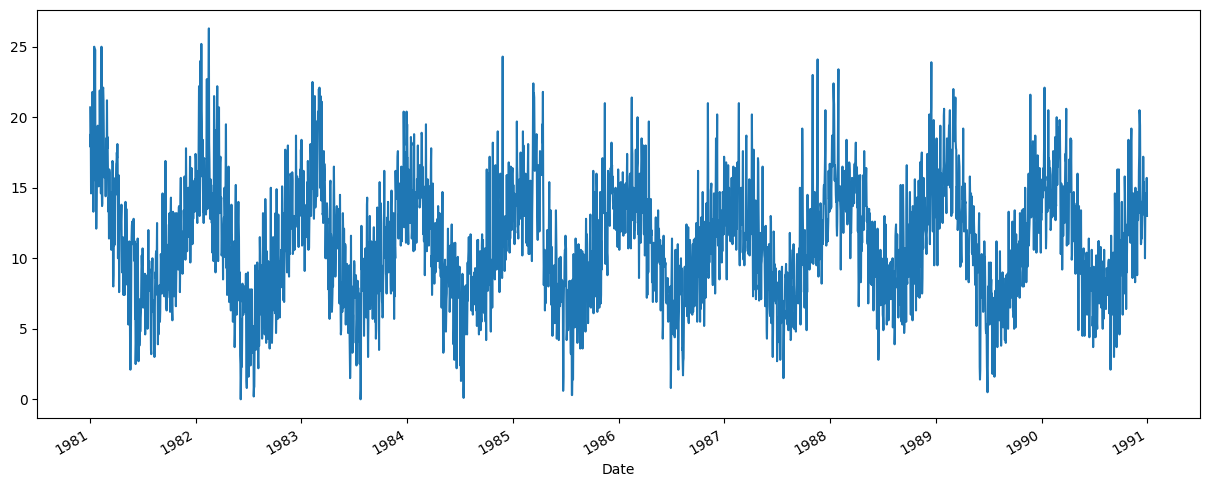

In [10]:
# or we can make the plot figure wider

pyplot.figure(figsize=(15, 6))
series.plot()
pyplot.show()

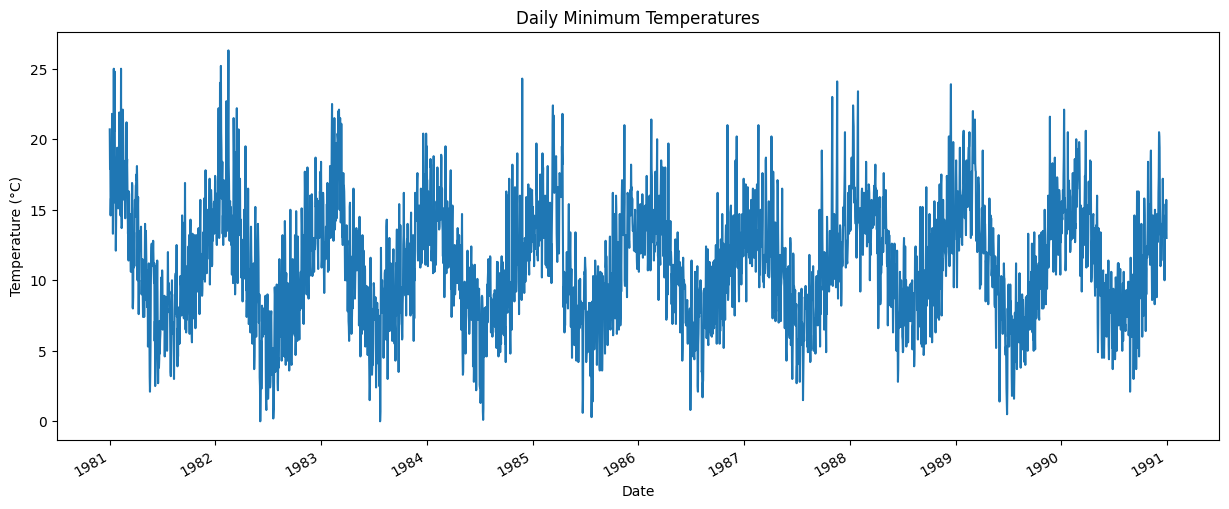

In [13]:
# Customize the plot

pyplot.figure(figsize=(15, 6))
pyplot.title('Daily Minimum Temperatures')
pyplot.xlabel('Date')
pyplot.ylabel('Temperature (°C)')
series.plot()
pyplot.show()

The line plot is quite dense.

Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots.

Below is an example of changing the style of the line to be black dots instead of a connected line (the style=’k.’ argument).

We could change this example to use a dashed line by setting style to be ‘k–‘.

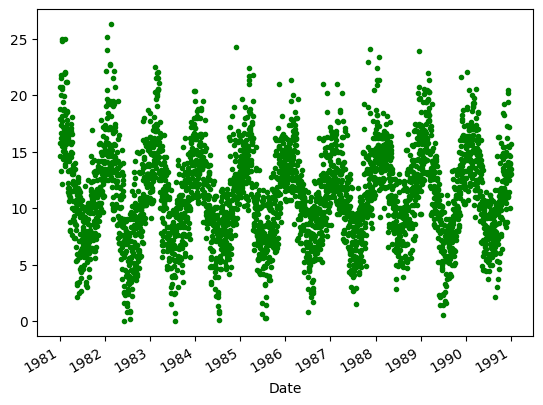

In [14]:
series.plot(style='g.')
pyplot.show()

Running the example recreates the same line plot with dots instead of the connected line.

The `style` parameter in `series.plot(style)` allows you to customize the appearance of the line or markers in your plot. It is a convenient way to specify a variety of styles in a single parameter, using a simple string format. Here's a breakdown of the kinds of styles you can specify using this parameter:

1. **Color Codes**:
   - You can specify the color of the line or markers using a single-letter string.
   - Example: `'b'` for blue, `'g'` for green, `'r'` for red, `'c'` for cyan, `'m'` for magenta, `'y'` for yellow, `'k'` for black, and `'w'` for white.

2. **Line Styles**:
   - You can specify the style of the line using strings.
   - Example: `'-'` for a solid line, `'--'` for a dashed line, `'-.'` for a dash-dot line, and `':'` for a dotted line.

3. **Marker Styles**:
   - You can specify the style of the markers using strings.
   - Example: `'o'` for circles, `'s'` for squares, `'.'` for points, `'D'` for diamonds, `'^'` for upwards triangles, `'p'` for pentagons, and so on.

4. **Combination of Color, Line, and Marker Styles**:
   - You can combine color, line, and marker styles by concatenating their codes in a single string.
   - Example: `'bo-'` for blue circles connected by solid lines, `'g^--'` for green triangles connected by dashed lines, and `'ro:'` for red circles connected by dotted lines.

Here are some examples of how you can use the `style` parameter in `series.plot(style)`:

```python
import matplotlib.pyplot as plt

# Blue solid line
series.plot(style='b-')
plt.title('Blue Solid Line')
plt.show()

# Green dashed line
series.plot(style='g--')
plt.title('Green Dashed Line')
plt.show()

# Red circles connected by dotted lines
series.plot(style='ro:')
plt.title('Red Circles with Dotted Lines')
plt.show()

# Cyan squares with no line
series.plot(style='cs')
plt.title('Cyan Squares with No Line')
plt.show()
```

Each `style` string is a combination of a color code, a line style, and a marker style, in any order. The `style` parameter is a very flexible way to quickly customize the appearance of your plot.

### Comparing line plots for multiple years

It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year.

The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct comparison.


The command `groups = series.groupby(Grouper(freq='A'))` is used to group a time series data by a specific frequency. In this command:

1. `series` is assumed to be a pandas Series object with a DatetimeIndex (i.e., time series data).

2. `Grouper(freq='A')` creates a `Grouper` object, which is a utility in pandas for grouping data. The `freq` parameter specifies the frequency at which to group the data.
   - The `'A'` in `freq='A'` stands for "Annual" or "Year End". It specifies that data will be grouped based on year-end dates. For example, all the data with a timestamp in 1981 will be one group, all the data with a timestamp in 1982 will be another group, and so on.

3. `groupby(Grouper(freq='A'))` applies this grouping to the `series` object. This means that `series` will be split into separate groups, where each group contains all the data points from a single year.

4. `groups` is the resulting object from the `groupby` operation. It is a `GroupBy` object, which is a special type of object in pandas that represents the grouped data. It is essentially a collection of groups (each one being a set of data points from a single year, in this case), and you can apply various operations to these groups (like computing the mean, sum, etc. of each group).

Here is an example to illustrate how this works:

```python
import pandas as pd
from pandas import Grouper

# Assume 'series' is your time series data
# ...

# Group the data by year-end
groups = series.groupby(Grouper(freq='A'))

# Print the mean of each group (i.e., the mean temperature for each year)
for name, group in groups:
    print(name.year, group.mean())
```

In this example, the `for name, group in groups:` loop iterates over each group produced by the `groupby` operation. For each group, `name` is the name of the group (which, in this case, is the year-end date for each group) and `group` is the data in that group (i.e., all the data points from that year). The `print(name.year, group.mean())` statement prints the mean of each group, so this script would print the mean temperature for each year.

The `Grouper` object is a powerful tool in pandas for grouping time series data at various levels of granularity, and it is especially useful for resampling time series data and computing summary statistics over different time intervals.


Let's get back to our time series of minium temperators. The example below shows how to compare the 10 years in a single plot.

The groups are then enumerated and the observations for each year are stored as columns in a new DataFrame.

Finally, a plot of this contrived DataFrame is created with each column visualized as a subplot with legends removed to cut back on the clutter.

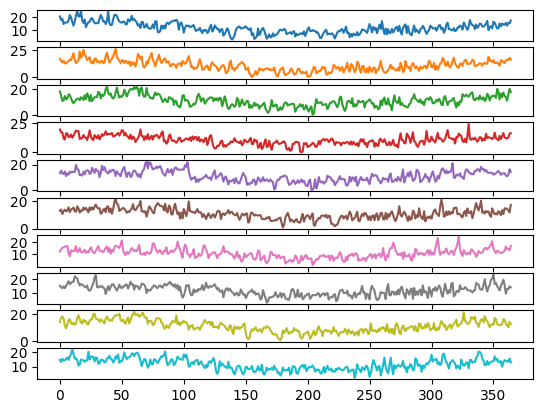

In [19]:
from pandas import DataFrame
from pandas import Grouper

groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values

years.plot(subplots=True, legend=False)
pyplot.show()

Running the example creates 10 line plots, one for each year from 1981 at the top and 1990 at the bottom, where each line plot is 365 days in length.

## 2 Time Series Histogram and Density Plots
Another important visualization is of the distribution of observations themselves.

This means a plot of the values without the temporal ordering.

Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

The example below creates a histogram plot of the observations in the Minimum Daily Temperatures dataset. A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.

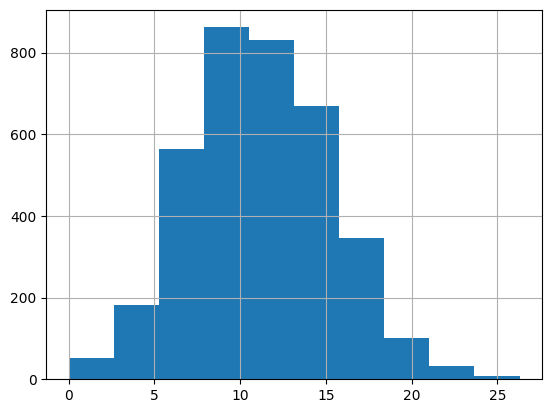

In [22]:
series.hist()
pyplot.show()

Running the example shows a distribution that looks strongly Gaussian. The plotting function automatically selects the size of the bins based on the spread of values in the data.

We can get a better idea of the shape of the distribution of observations by using a density plot.

This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution.

Below is an example of a density plot of the Minimum Daily Temperatures dataset.The kind='kde' specifies a Kernel Density Estimation plot. A way of smoothing out data to visualize the distribution. It produces a probability density function.

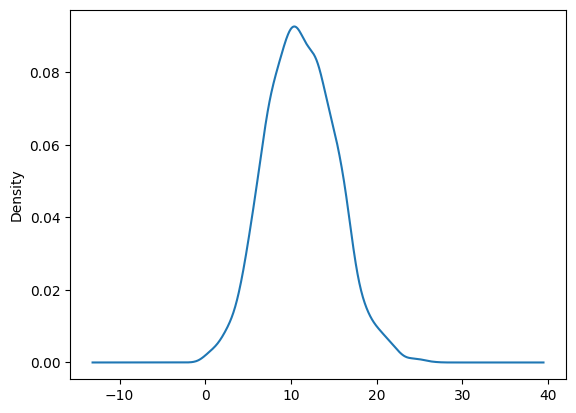

In [23]:
series.plot(kind='kde')
pyplot.show()

Running the example creates a plot that provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian.

Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution, like the Box-Cox transform.

## 3 Time Series Box and Whisker Plots by Interval
Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval.

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.

Below is an example of grouping the Minimum Daily Temperatures dataset by years, as was done above in the plot example. A box and whisker plot is then created for each year and lined up side-by-side for direct comparison.

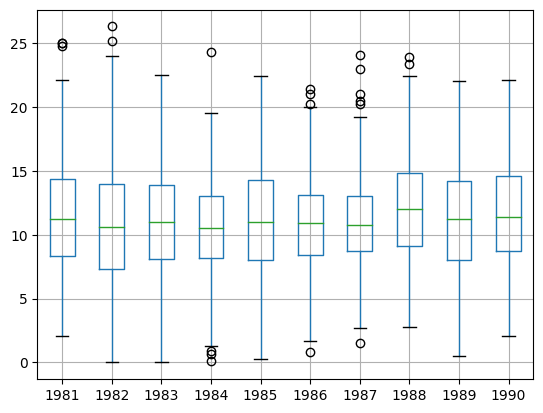

In [24]:
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()

We may also be interested in the distribution of values across months within a year.

The example below creates 12 box and whisker plots, one for each month of 1990, the last year in the dataset.

In the example, first, only observations from 1990 are extracted.

Then, the observations are grouped by month, and each month is added to a new DataFrame as a column.

Finally, a box and whisker plot is created for each month-column in the newly constructed DataFrame.

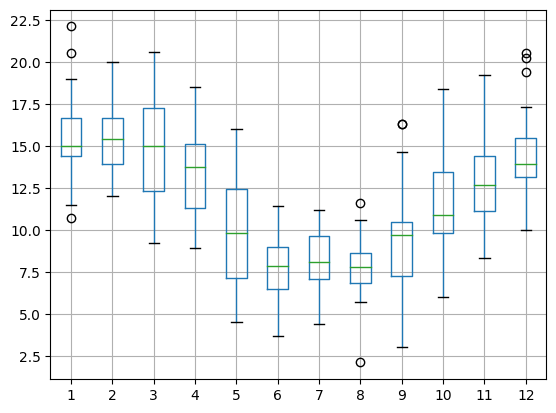

In [25]:
from pandas import concat
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

Running the example creates 12 box and whisker plots, showing the significant change in distribution of minimum temperatures across the months of the year from the Southern Hemisphere summer in January to the Southern Hemisphere winter in the middle of the year, and back to summer again.

## 4 Time Series Heat Maps
A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color.

This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens).

Like the box and whisker plots, we can compare observations between intervals using a heat map.

In the case of the Minimum Daily Temperatures, the observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. A heat map of this matrix can then be plotted.

Below is an example of creating a heatmap of the Minimum Daily Temperatures data. The matshow() function from the matplotlib library is used as no heatmap support is provided directly in Pandas.

For convenience, the matrix is rotation (transposed) so that each row represents one year and each column one day. This provides a more intuitive, left-to-right layout of the data.

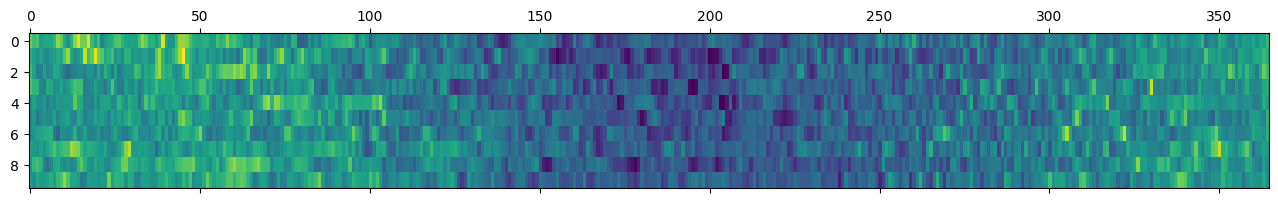

In [26]:
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

In [27]:
years

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
1981,20.7,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,...,15.0,12.8,15.0,14.2,14.0,15.5,13.3,15.6,15.2,17.4
1982,17.0,15.0,13.5,15.2,13.0,12.5,14.1,14.8,16.2,15.8,...,10.8,15.6,15.3,13.9,13.0,15.3,16.3,15.8,17.7,16.3
1983,18.4,15.0,10.9,11.4,14.8,12.1,12.8,16.2,15.5,13.0,...,12.2,16.7,13.8,17.5,15.0,13.9,11.1,16.1,20.4,18.0
1984,19.5,17.1,17.1,12.0,11.0,16.3,16.1,13.0,13.4,15.2,...,14.2,11.4,13.7,16.5,12.8,12.2,12.0,12.6,16.0,16.4
1985,13.3,15.2,13.1,12.7,14.6,11.0,13.2,12.2,14.4,13.7,...,13.7,12.0,13.1,13.2,13.3,11.5,10.8,12.0,16.3,14.4
1986,12.9,13.8,10.6,12.6,13.7,12.6,13.1,15.4,11.9,13.8,...,11.6,9.7,13.4,10.5,14.7,14.6,14.2,13.2,11.7,17.2
1987,12.3,13.8,15.3,15.6,16.2,16.3,16.8,11.0,8.5,13.2,...,11.2,11.4,11.2,12.1,12.7,16.2,14.2,14.3,13.3,16.7
1988,15.3,14.3,13.5,15.0,13.6,15.2,17.0,18.7,16.5,17.4,...,11.9,15.2,17.3,19.8,15.8,9.5,12.9,12.9,14.8,14.1
1989,14.3,17.4,18.5,16.8,11.5,9.5,12.2,15.7,16.3,13.6,...,11.8,12.0,12.7,16.4,16.0,13.3,11.7,10.4,14.4,12.7
1990,14.8,13.3,15.6,14.5,14.3,15.3,16.4,14.8,17.4,18.8,...,13.2,13.9,10.0,12.9,14.6,14.0,13.6,13.5,15.7,13.0


The plot shows the cooler minimum temperatures in the middle days of the years and the warmer minimum temperatures in the start and ends of the years, and all the fading and complexity in between.

As with the box and whisker plot example above, we can also compare the months within a year.

Below is an example of a heat map comparing the months of the year in 1990. Each column represents one month, with rows representing the days of the month from 1 to 31.

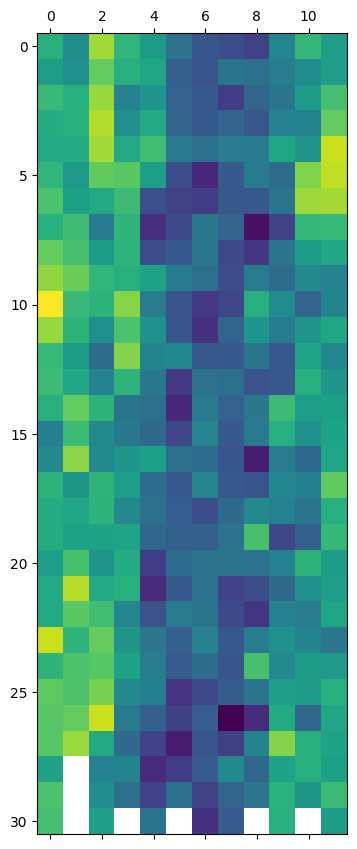

In [29]:
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

So it works. Let’s break it down step by step to understand how this works:

1. **`one_year = series['1990']`**:
   - This line selects the data for the year 1990 from the entire time series dataset. Assuming `series` is a Pandas Series with a DatetimeIndex, this line will filter the data to include only the entries where the date is within the year 1990.

2. **`groups = one_year.groupby(Grouper(freq='M'))`**:
   - Here, the data from 1990 (`one_year`) is grouped by month. The `Grouper(freq='M')` part tells Pandas to create groups based on month-end dates. After this line, `groups` is a GroupBy object where each group represents the data for a single month in the year 1990.

3. **`months = concat([DataFrame(x[1].values) for x in groups], axis=1)`**:
   - This line is concatenating the values for each month (group) into a new DataFrame called `months`. Specifically:
     - `x[1].values` extracts the actual temperature values for each month (group `x`).
     - `DataFrame(x[1].values)` converts the values for each month into a separate Pandas DataFrame.
     - `[DataFrame(x[1].values) for x in groups]` creates a list of these DataFrames, one for each month.
     - `concat(..., axis=1)` concatenates these DataFrames horizontally (along `axis=1`), which means each DataFrame becomes a separate column in the resulting `months` DataFrame.

4. **`months.columns = range(1,13)`**:
   - This line renames the columns of the `months` DataFrame to be the integers from 1 to 12, representing the months of the year. This is done for clarity and to make the plot more interpretable.

5. **`pyplot.matshow(months, interpolation=None, aspect='auto')`**:
   - This line creates a matrix plot of the `months` DataFrame using Matplotlib’s `matshow` function.
   - `months` is the data to be plotted, where each column is a month and each row is a day within that month.
   - `interpolation=None` specifies that no interpolation should be applied to the pixels in the plot. This means that the data is represented as-is, without trying to smooth or blend the values.
   - `aspect='auto'` allows the plot to automatically adjust the aspect ratio of the plot based on the dimensions of the data.

6. **`pyplot.show()`**:
   - This line displays the plot. It tells Matplotlib to render the plot and show it as an output. Until this command is called, the plot is constructed in the background but not displayed.

In summary, this block of code is creating a heatmap-style visualization of daily minimum temperatures for each month of the year 1990. Each row of the plot represents a day within a month, and each column represents a month, with the color indicating the temperature on that day. This type of visualization can be very helpful for spotting seasonal or monthly patterns in time series data.

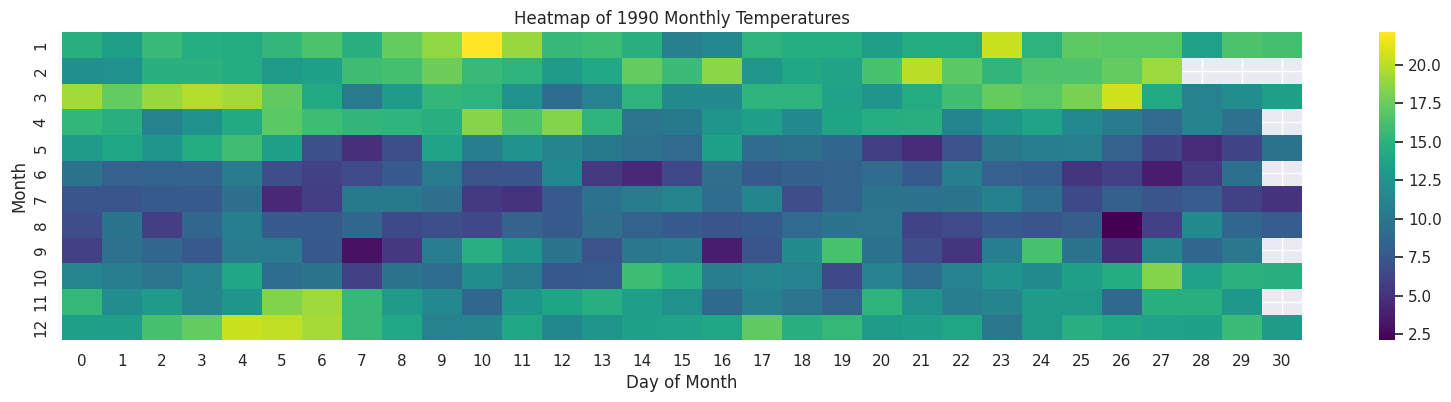

In [40]:
# Instead of using pyplot.matshow we can also use the heatmap from the seaborn library
import seaborn as sns

# The color map to use for the heatmap. ‘viridis’ is a perceptually uniform color map,
# which is great for accurately representing the data visually. Seaborn and Matplotlib
# have various other colormaps you can use, such as 'coolwarm', 'Blues', etc.

sns.heatmap(data=months.T, cmap='viridis')

# Adding title and labels
pyplot.title('Heatmap of 1990 Monthly Temperatures')
pyplot.ylabel('Month')
pyplot.xlabel('Day of Month')

# Show the plot
pyplot.show()

<Axes: >

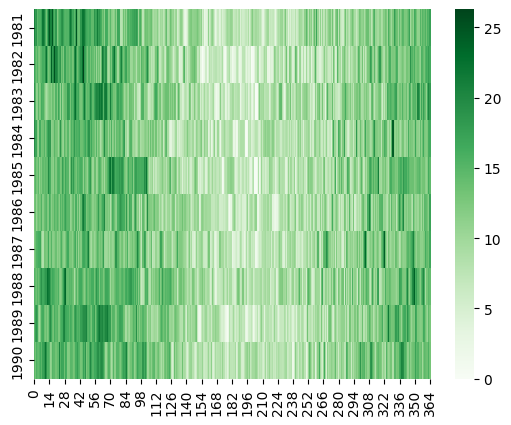

In [30]:
# Alternatively we can plot years <> days
# we don't need to use pyplot

sns.heatmap(years, cmap="Greens")

<Axes: >

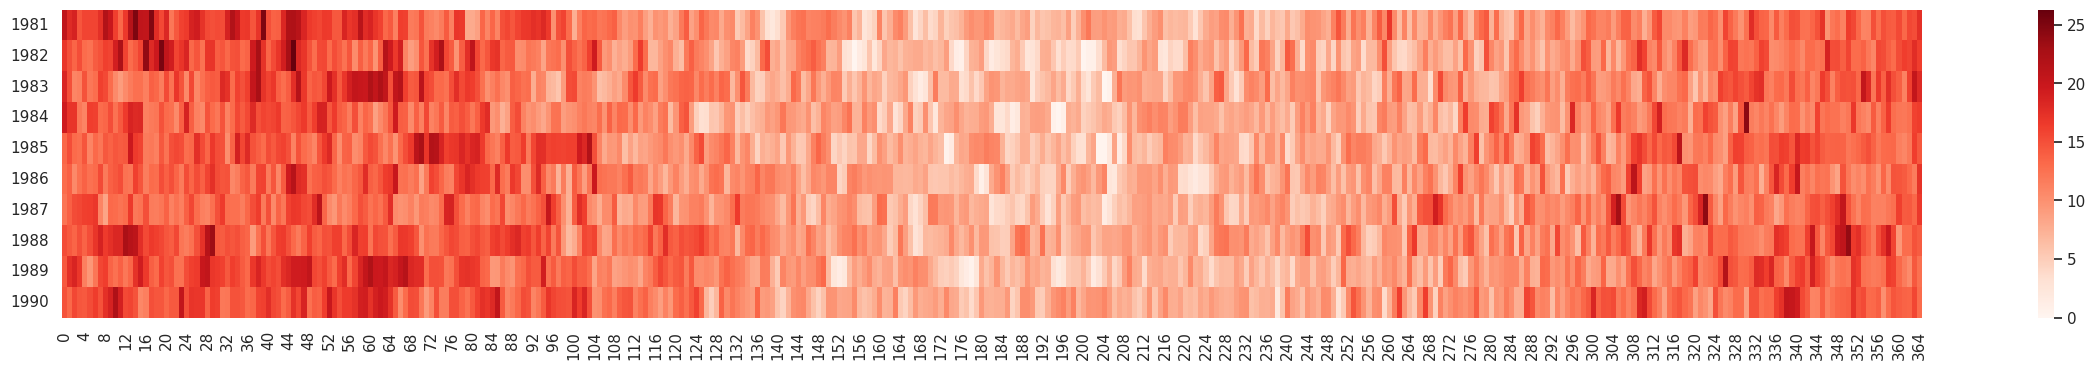

In [31]:
# change the figure size
#
sns.set(rc = {'figure.figsize':(30,4)})
sns.heatmap(years, cmap="Reds")

## 5 Time Series Lag Scatter Plots
Time series modeling assumes a relationship between an observation and the previous observation.

Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot.

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
Either relationship is good as they can be modeled.
More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.

A ball in the middle or a spread across the plot suggests a weak or no relationship.

Below is an example of a lag plot for the Minimum Daily Temperatures dataset.

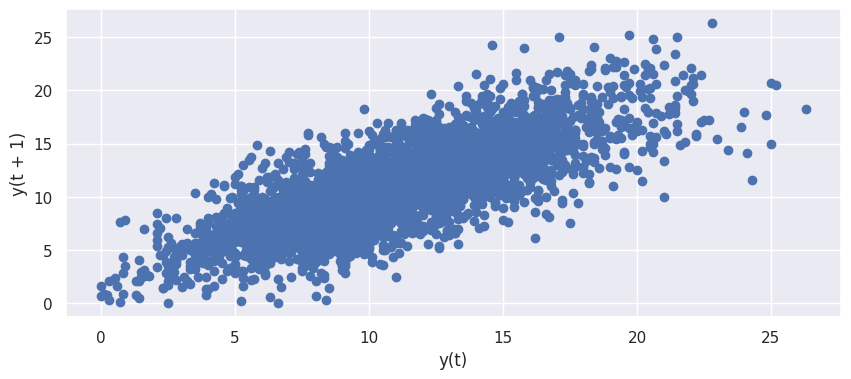

In [41]:
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

## 6 Time Series Autocorrelation Plots
We can quantify the strength and type of relationship between observations and their lags.

In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation).

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag.

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function.

The example below creates an autocorrelation plot for the Minimum Daily Temperatures dataset:

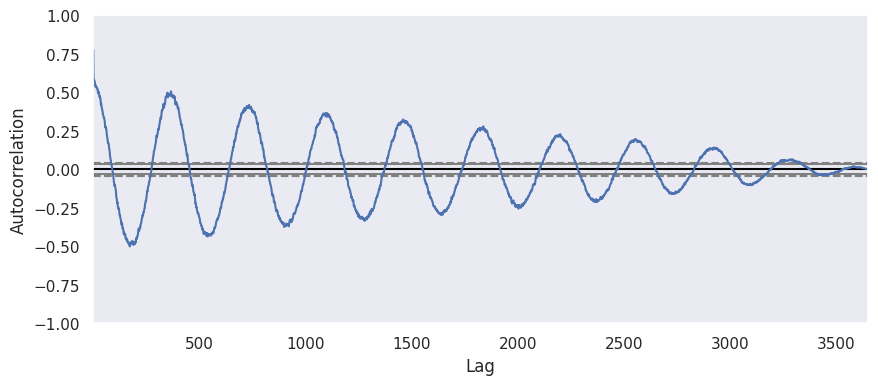

In [42]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

## 7 Visualising hierarchical data with treemap, sunburst and bubble chart

Get inspired by towardsdatascience: https://towardsdatascience.com/visualization-with-plotly-express-comprehensive-guide-eb5ee4b50b57

More about plotly on https://plotly.com/chart-studio-help/tutorials/ and https://plotly.com/python/

Documentation on the python api at https://plotly.com/python-api-reference/

In [43]:
fig = px.treemap(
    names = ["A","B", "C", "D", "E"],
    parents = ["", "A", "B", "C", "A"]
)

fig.show()

In [44]:
fig = px.sunburst(
    names = ["A","B", "C", "D", "E"],
    parents = ["", "A", "B", "C", "A"]
)

fig.show()

In [45]:
# In our case we want to visualise data in dataframes
# the plotly.express library provides some standard data examples
#
# here is an overview of sample datasets: http://plotly.github.io/datasets/

df = px.data.tips()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [46]:
fig = px.treemap(df, path=['time', 'day', 'sex'],
                 values='tip')
fig.show()

In [47]:
fig = px.sunburst(df, path=['time','smoker','sex','day' ],
                 values='total_bill')
fig.show()

In [48]:
# Bubble chart (actually based on scatter)

fig = px.scatter(df, x="time", y="day",
	         size="tip", color="sex",
                 hover_name="tip", log_x=False, size_max=60)
fig.show()

## 8 Visualising textual data with wordcloud

Also see https://github.com/amueller/word_cloud for more examples

In [49]:
# create a txt file. E.g using https://totheweb.com/learning_center/tools-convert-html-text-to-plain-text-for-content-review/ and taking
# the BFH webpage https://www.bfh.ch/de/themen/cyber-security/. Copy the output to a file bfh.txt and upload it to this colab.

import os
text=open('bfh.txt').read()
text

"Berner Fachhochschule\n\nStartseite\n\nAktuell\n\nÜbersicht\n\nVeranstaltungen\n\nInfoveranstaltungen\n\nBeratung\n\nBFH:persönlich\n\nMagazine + Blogs\n\nNews\n\nCoronavirus: Aktuelle Informationen\n\nStudium\n\nÜbersicht\n\nAlle Studiengänge\n\nBachelor-Studiengänge\n\nMaster-Studiengänge\n\nVorkurse + Passerelle\n\nBFH diagonal + Zusatzzertifikate\n\nInternational studieren\n\nStudium + Leben\n\nÜber das Studium\n\nWeiterbildung\n\nÜbersicht\n\nAlle Weiterbildungen\n\nCAS\n\nDAS\n\nEMBA/MAS\n\nKurse + Studienreisen\n\nÜber die Weiterbildung\n\nForschung\n\nÜbersicht\n\nLeistungsangebot\n\nBFH-Zentren\n\nForschungsbereiche\n\nProjekte\n\nPublikationen\n\nÜber die Forschung\n\nDienstleistungen\n\nÜbersicht\n\nÜber die Dienstleistung\n\nÜber die BFH\n\nÜbersicht\n\nPersonensuche\n\nProfil + Werte\n\nLeitung + Organisation\n\nZahlen + Fakten\n\nGeschäftsbericht 2020\n\nStandorte + Infrastruktur\n\nService + Beratung\n\nRechtliche Grundlagen\n\nKarriere\n\nBroschüren + Publikationen\n\n

In [50]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [51]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

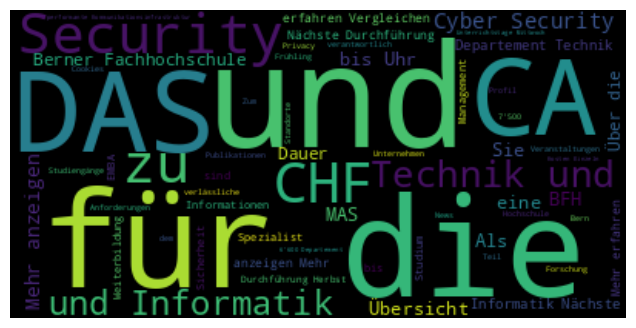

In [52]:
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

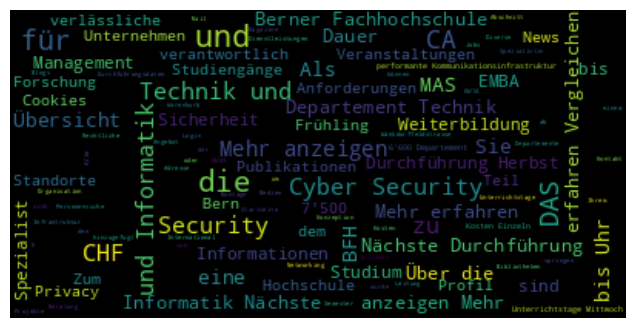

In [53]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=20).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

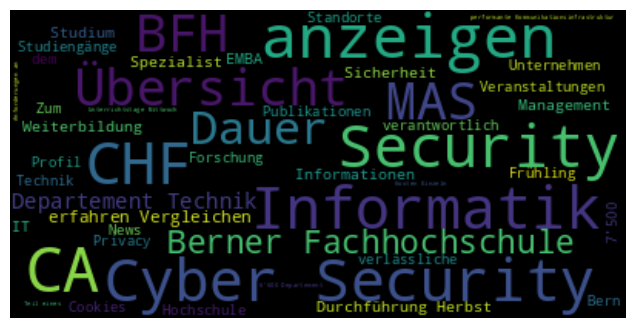

In [54]:
# The wordcloud shows stopwords frequently. We should remove stopwords in this case

# we can use the STOPWORDS but they're in English. Let's add some manually for German

germanstopwords = set({'Und','Zu','Das','Mehr','Die','eine','Als','bis','Uhr','Sie','für','nächste', 'Sind', 'über','in'})
wordcloud = WordCloud(max_font_size=40,stopwords=germanstopwords).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 9 Back to digital forensics: visualising a Windows security eventlog

We have collected the security event log of a Windows computer that was used in the MUS2019 capture the flag contest. The file was extracted using log2timeline and saved as an excel file. We will read the file and explore the data. You will learn more about log2timeline tomorrow on day 2.

In [55]:
# import various libraries that we will use
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

# read the mus2019_win_security csv file
mydateparser = lambda x: dt.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')
eventlog = pd.read_csv(
    "mus2019_win_security_evtx.csv",
    sep=",",usecols=[0,1,2,3,4,5],
    header=0,
    names=['Level','Date and Time','Source','Event ID','Task Category','Information'],
    dtype={'Event ID':str},
    parse_dates = ['Date and Time'],
    date_parser=mydateparser,
    index_col='Date and Time'
    )

Let's take a look at what we got

In [56]:
eventlog

,Level,Source,Event ID,Task Category,Information
Date and Time,,,,,
2019-03-20 22:53:47,Information,Microsoft-Windows-Security-Auditing,4672,Special Logon,Special privileges assigned to new logon.\r\n\...
2019-03-20 22:53:47,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
2019-03-20 22:37:26,Information,Microsoft-Windows-Security-Auditing,4672,Special Logon,Special privileges assigned to new logon.\r\n\...
2019-03-20 22:37:26,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
2019-03-20 22:28:46,Information,Microsoft-Windows-Security-Auditing,4798,User Account Management,A user's local group membership was enumerated...
...,...,...,...,...,...
2018-07-28 09:24:47,Information,Microsoft-Windows-Security-Auditing,4688,Process Creation,A new process has been created.\r\n\r\nCreator...
2018-07-28 09:24:45,Information,Microsoft-Windows-Security-Auditing,4688,Process Creation,A new process has been created.\r\n\r\nCreator...
2018-07-28 09:24:45,Information,Microsoft-Windows-Security-Auditing,4826,Other Policy Change Events,Boot Configuration Data loaded.\r\n\r\nSubject...


In [57]:
eventlog.head()

,Level,Source,Event ID,Task Category,Information
Date and Time,,,,,
2019-03-20 22:53:47,Information,Microsoft-Windows-Security-Auditing,4672,Special Logon,Special privileges assigned to new logon.\r\n\...
2019-03-20 22:53:47,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
2019-03-20 22:37:26,Information,Microsoft-Windows-Security-Auditing,4672,Special Logon,Special privileges assigned to new logon.\r\n\...
2019-03-20 22:37:26,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
2019-03-20 22:28:46,Information,Microsoft-Windows-Security-Auditing,4798,User Account Management,A user's local group membership was enumerated...


# Exercises



## 1 Create a histogram of the Task Category values. Which category occcurs most often?

In [ ]:
# 1a Count the values so you get an idea
#
# Your answer

In [ ]:
# 1b Histogram visualisation
# hint: check the docs https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
#
# Your answer

In [ ]:
# 1c As a bar plot
#
# Your answer

## 2 Create a heatmap visualising number of entries per day with hours vertical

Hint: the date time object can be split in year month day and hours and use the Searborn heatmap

In [ ]:
# Your answer

## 3 Create a heatmap as in #2 but now only for logoff events

In [ ]:
# your answer

## 4 Create a treemap visualisation based on the 2nd and 3rd folder in the path using the combined file size

Use the DirPrint_Filelist - clean.xlsx file that you used in part 1 and add the Folders column by splitting the Path column

In [ ]:
# Your answer
#
# hint: here is a page with help on string splitting https://jakevdp.github.io/WhirlwindTourOfPython/14-strings-and-regular-expressions.html

## 5 Create a word cloud on a text that you have selected yourself

In [ ]:
# your answer
#
# hint: Reuse the code from example 8 to get started and find some example text
# questions:
# Did you run into issues?
# Find any interesting results?
# What about the stop words?

## 6 Perform a Benford analysis on the file sizes of the DirPrint_Filelist - clean.xlsx file that we used this morning`

In [ ]:
# your answer

# advanced question: do you see anything unusual? how can you further investigate with what you learned today?